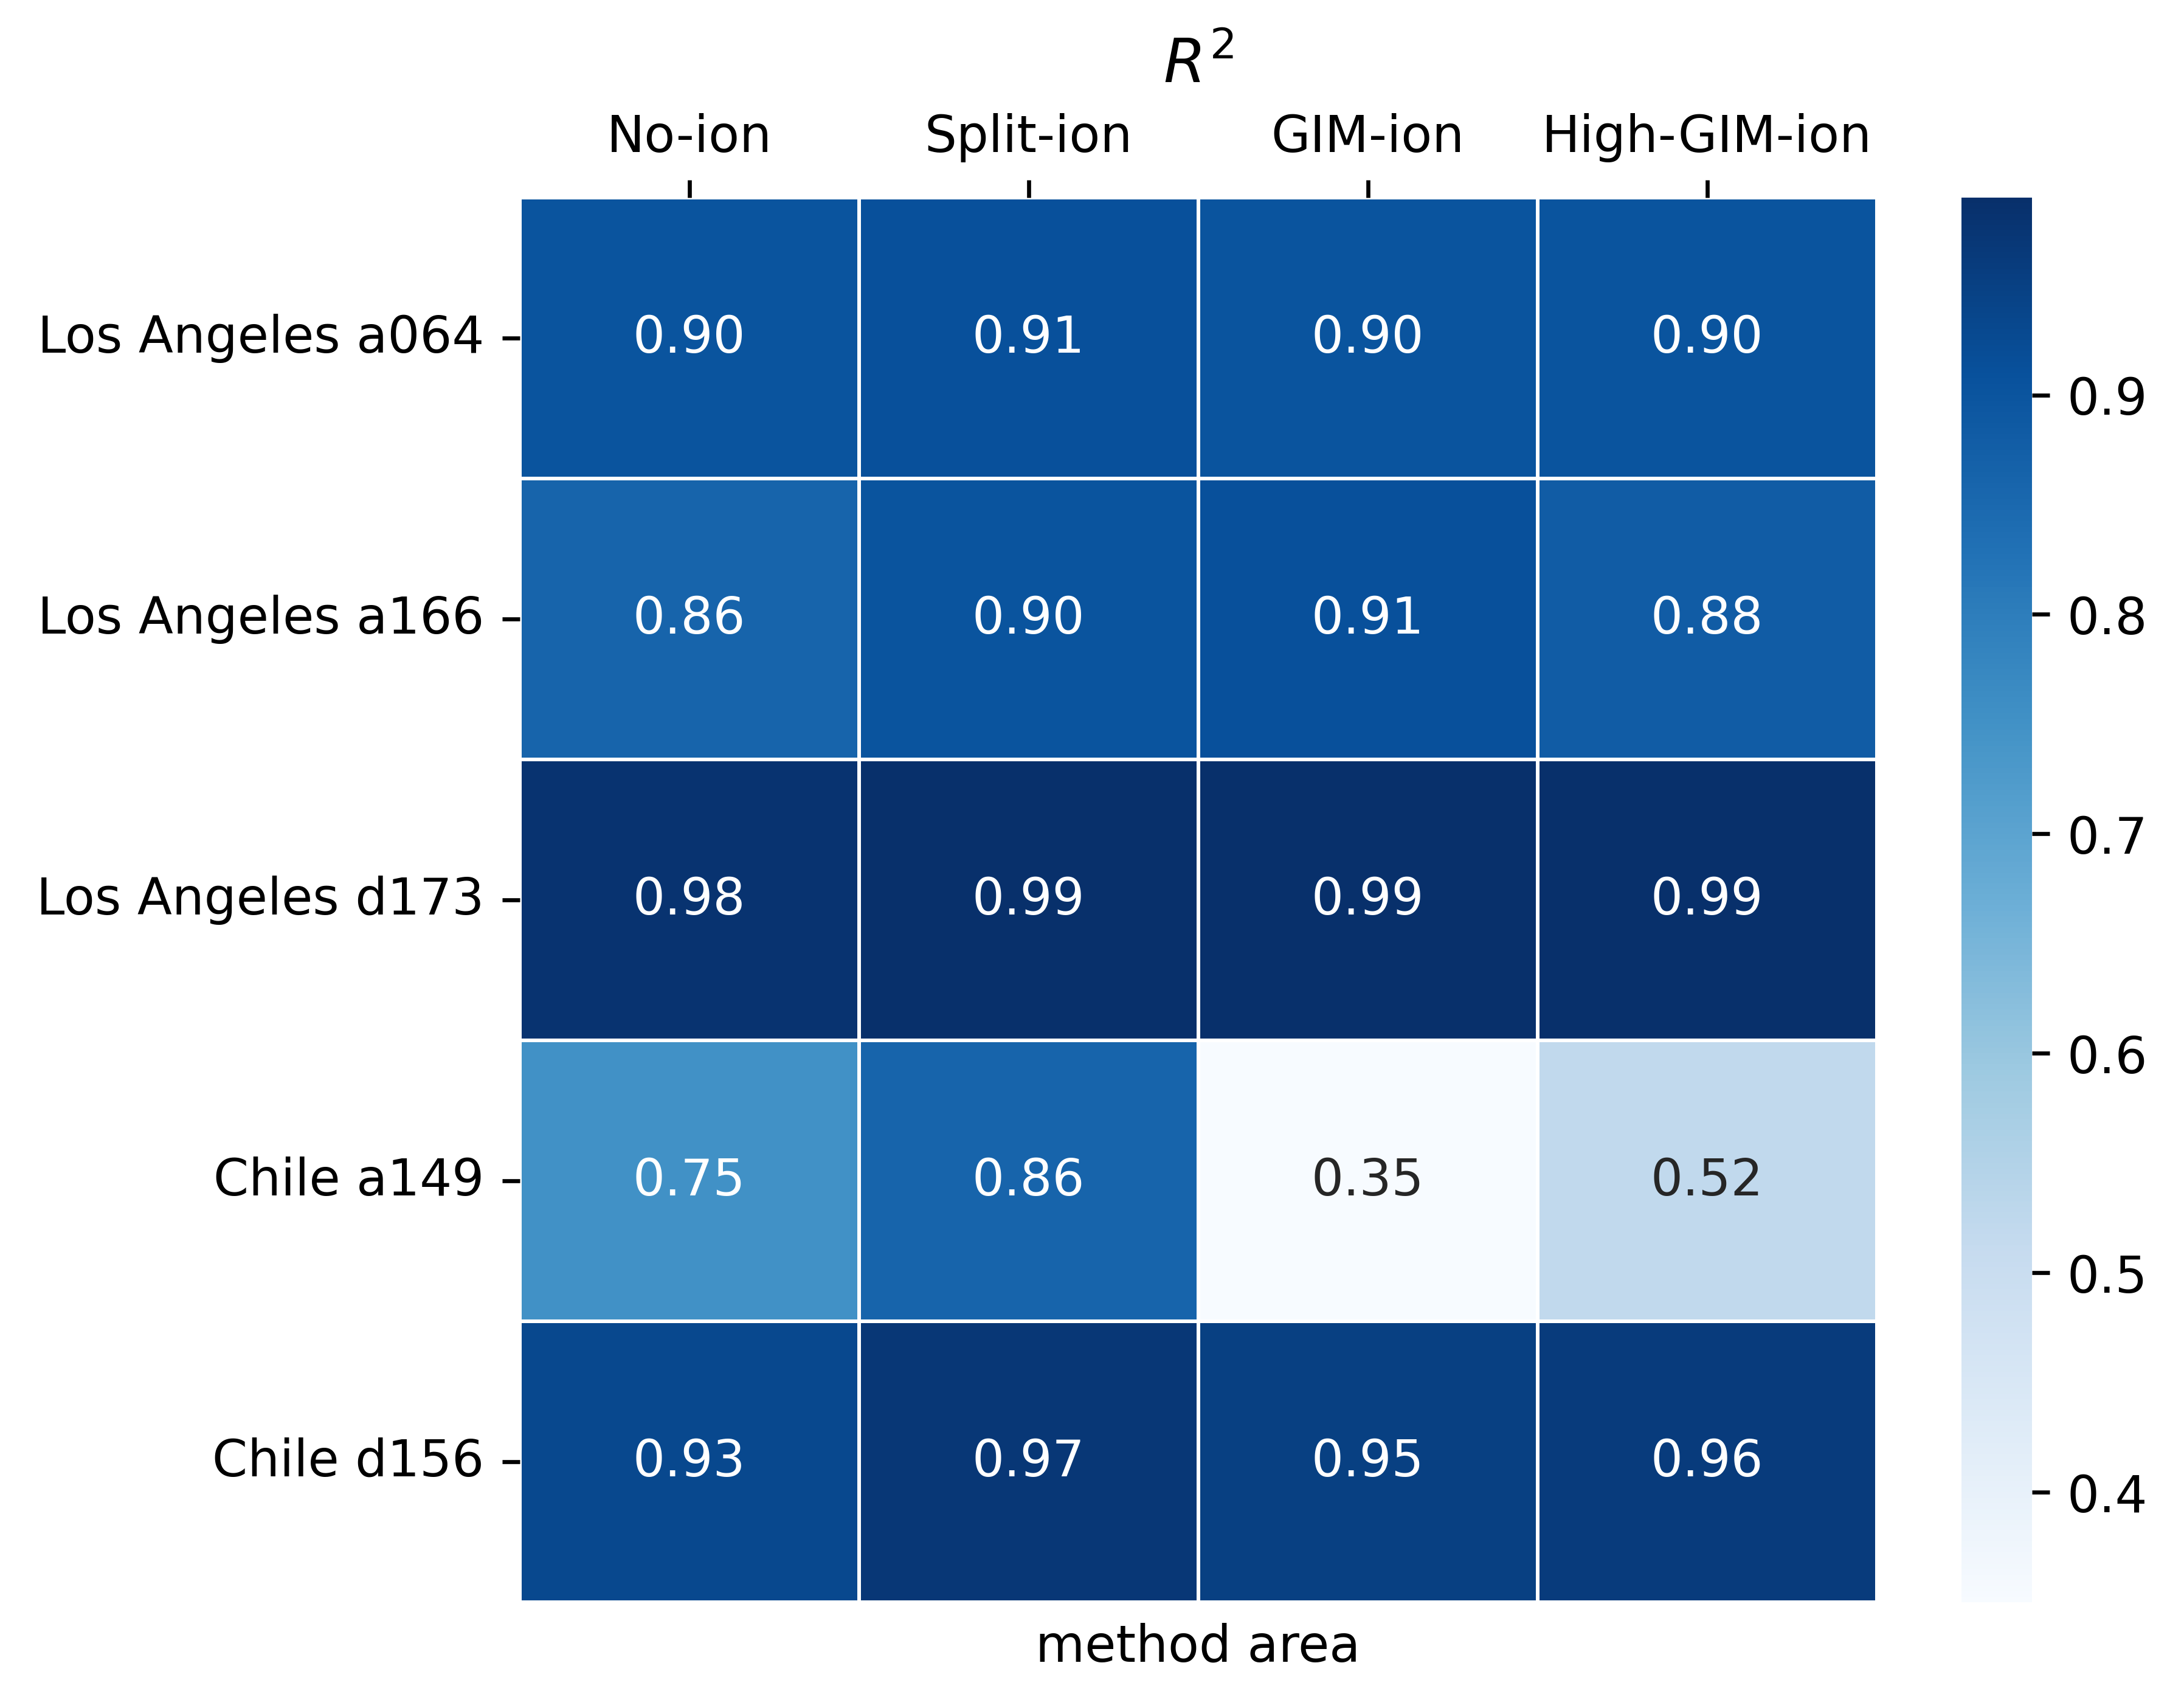

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# 创建数据
data = {
    'method area': ['No-ion', 'Split-ion', 'GIM-ion', 'High-GIM-ion'],
    'Los Angeles a064': [0.90, 0.91, 0.90, 0.90],
    'Los Angeles a166': [0.86, 0.90, 0.91, 0.88],
    'Los Angeles d173': [0.98, 0.99, 0.99, 0.99],
    'Chile a149': [0.75, 0.86, 0.35, 0.52],
    'Chile d156': [0.93, 0.97, 0.95, 0.96]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 转置DataFrame，以便每个地区成为一行
df = df.set_index('method area')

# 创建热图
plt.figure(figsize=(6, 5), dpi=600) 
heatmap = sns.heatmap(df.T, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)

# 调整坐标轴标签位置
plt.title(r'$R^2$')
plt.gca().xaxis.set_ticks_position('top')  # 将x轴标签放在上方

plt.show()

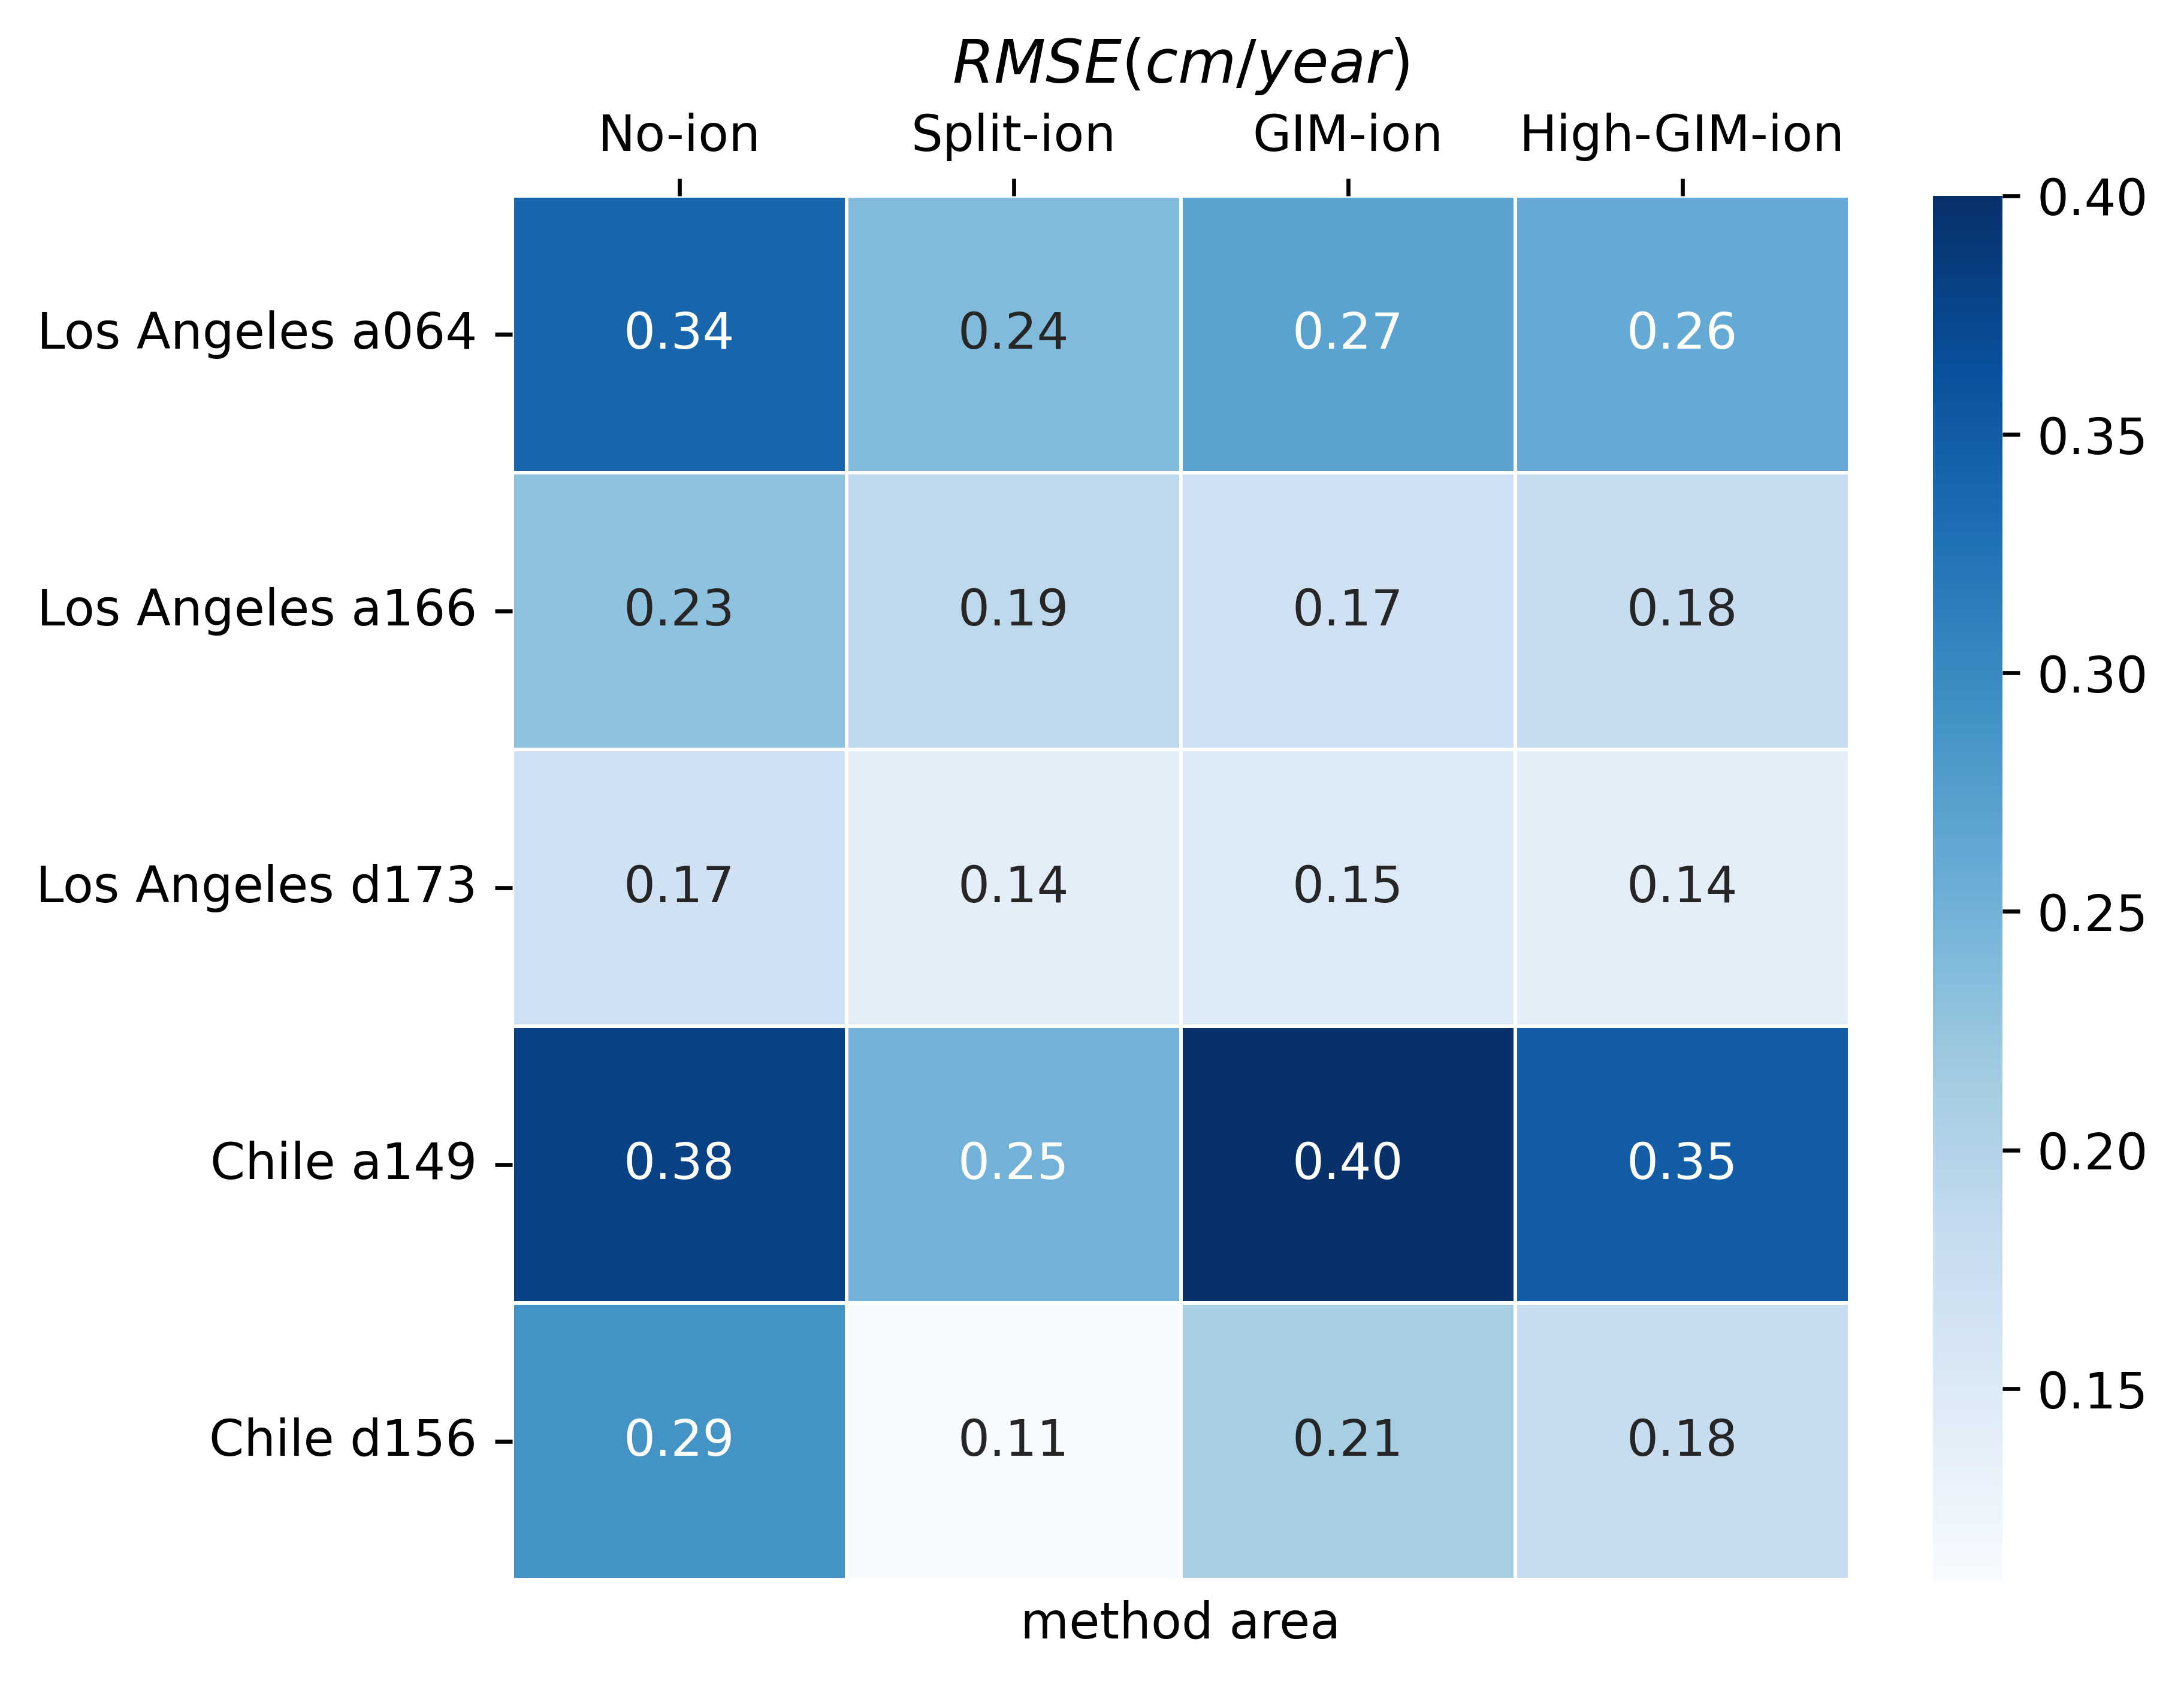

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# 创建数据
data = {
    'method area': ['No-ion', 'Split-ion', 'GIM-ion', 'High-GIM-ion'],
    'Los Angeles a064': [0.34, 0.24, 0.27, 0.26],
    'Los Angeles a166': [0.23, 0.19, 0.17, 0.18],
    'Los Angeles d173': [0.17, 0.14, 0.15, 0.14],
    'Chile a149': [0.38, 0.25, 0.40, 0.35],
    'Chile d156': [0.29, 0.11, 0.21, 0.18]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 转置DataFrame，以便每个地区成为一行
df = df.set_index('method area')

# 创建热图
plt.figure(figsize=(6, 5), dpi=600)
heatmap = sns.heatmap(df.T, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)

# 调整坐标轴标签位置
plt.title(r'$RMSE (cm/year)$')
plt.gca().xaxis.set_ticks_position('top')  # 将x轴标签放在上方

plt.show()